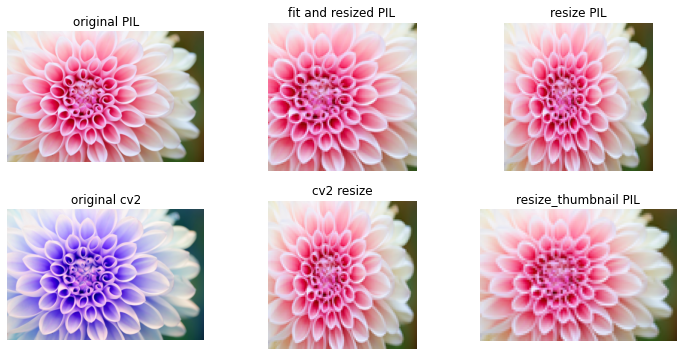

In [23]:
# Best fit and resize method
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from resizeimage import resizeimage
import cv2
import numpy as np

img = '/Users/sarah/Downloads/NkYsm.png'

size = (100, 100)
original_image = Image.open(img)

fit_and_resized_image = ImageOps.fit(original_image, size, Image.ANTIALIAS)
dd = original_image.resize(size, Image.ANTIALIAS)
gg = resizeimage.resize_thumbnail(original_image, size)

original_image2 = cv2.imread(img)
d2 = original_image.resize(size, Image.ANTIALIAS)

images = [original_image, fit_and_resized_image, dd, 
          original_image2, d2, gg]
tittles = ['original PIL', 'fit and resized PIL', 'resize PIL', 
           'original cv2', 'cv2 resize', 'resize_thumbnail PIL']

fig, plots = plt.subplots(2, 3, figsize=(12,6))
for row in plots:
    for ax in row:
        ax.imshow(images.pop(0))
        ax.set_title(tittles.pop(0))
        ax.axis('off')
plt.show(fig)

In [3]:
import cv2
import numpy as np
from skimage import io

img = io.imread('/Users/sarah/Downloads/DNM65.png')[:, :, :-1]
average = img.mean(axis=0).mean(axis=0)

In [4]:
pixels = np.float32(img.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

In [5]:
dominant = palette[np.argmax(counts)]

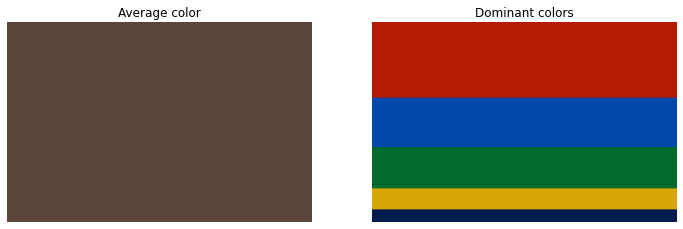

In [6]:
import matplotlib.pyplot as plt

avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
rows = np.int_(img.shape[0]*freqs)

dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

# TLDR answer

In [1]:
import cv2
import numpy
myimg = cv2.imread('/Users/sarah/Documents/Resources/DNM65.png')
avg_color_per_row = numpy.average(myimg, axis=0)
avg_color = numpy.average(avg_color_per_row, axis=0)
print(avg_color)

[58.11971896 69.30190754 91.63179156]


[76.41780978 75.29374763 33.96892762] 7.92%
[201.27402056  31.73298078  77.75592135] 8.01%
[215.50659664 114.03813885 141.47563084] 18.81%
[223.39412057 172.60068683 188.20921428] 29.14%
[233.9728251  217.10835143 229.12940825] 36.12%


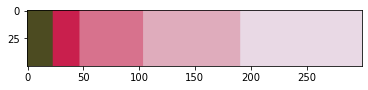

In [27]:
# https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv/43111221
import cv2, numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

# Load image and convert to a list of pixels
image = cv2.imread('/Users/sarah/Downloads/NkYsm.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=5).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)

c = plt.imshow(visualize) 
plt.show()

#visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
#cv2.imshow('visualize', visualize)
#cv2.waitKey()

In [1]:
# https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv/43111221
import cv2, numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float"); hist /= hist.sum()

    # Color and frecuency list by the iteration through each cluster
    features = []
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    for (percent, color) in colors:
        features.extend(color)
        features.append(percent)
    return features

# Load image and convert to a list of pixels
image = cv2.imread('/Users/sarah/Downloads/NkYsm.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Find and display most dominant colors
reshape = image.reshape((image.shape[0] * image.shape[1], 3))
cluster = KMeans(n_clusters=5).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)

print(visualize)



[76.42673132293206, 75.335126534326, 34.00416729807827, 0.07923123123123123, 201.27514836795217, 31.89992581602472, 77.84547477745234, 0.0805045045045045, 215.6802673678213, 114.41971045713149, 141.88022301770965, 0.18957357357357357, 223.36782152770857, 173.20692916623855, 188.65919605222254, 0.2925765765765766, 234.09533713518593, 217.34768534047774, 229.36923851057787, 0.3581141141141141]


In [ ]:
'''
If you put the image into OpenCV's BGR format, you can run this code that puts each pixel into one of four classifications:

blue-green-red-gray

In the code that follows we process the image used by Tonechas,
'''

import cv2 as cv
import numpy as np
from imageio import imread

image = imread('/Users/sarah/Downloads/DNM65.png')
img  = cv.cvtColor(np.array(image), cv.COLOR_RGB2BGR)
rows, cols, _ = img.shape

color_B = 0
color_G = 0
color_R = 0
color_N = 0 # neutral/gray color

for i in range(rows):
    for j in range(cols):
        k = img[i,j]
        if k[0] > k[1] and k[0] > k[2]:
            color_B = color_B + 1
            continue
        if k[1] > k[0] and k[1] > k[2]:
            color_G = color_G + 1
            continue        
        if k[2] > k[0] and k[2] > k[1]:
            color_R = color_R + 1
            continue
        color_N = color_N + 1

pix_total = rows * cols
print('Blue:', color_B/pix_total, 'Green:', color_G/pix_total, 'Red:',  color_R/pix_total, 'Gray:',  color_N/pix_total)

## Find the median RGB values of an image

In [ ]:
def MedianRGB(FileName, ImgWidth = 128, ImgHeight = 128): 
    '''''''''''''''''''''''''''''
    Find the mean or median RGB scores of an image. Inputs are:
    FileName: name of the file to be loaded
    ImgWidth: Number of pixels for image width
    ImgHeight:  Number of pixels for image height
    '''''''''''''''''''''''''''''
    import numpy as np
    from PIL import Image
    
    im = Image.open(FileName)
    r_list = []
    g_list = []
    b_list = []
    PixelArray = np.asarray(im)
    oneDarray = FlatenImage(FileName, ImgWidth, ImgHeight)
    for n, dim in enumerate(PixelArray):
        
        for num, row in enumerate(dim):
            r, g, b = row
            r_list.append(r)
            g_list.append(g)
            b_list.append(b)
    
    r_median = np.median(r_list)
    g_median = np.median(g_list)
    b_median = np.median(b_list)
      
    return {"r": r_median, "g": g_median, "b": b_median, "array": oneDarray}

## Python - find the average rgb color for an image

In [ ]:
#   iterate through each pixel in an image and
#   determine the average rgb color

# you will need to install the PIL module

from PIL import Image

class PixelCounter(object):
    ''' loop through each pixel and average rgb '''
    def __init__(self, imageName):
        self.pic = Image.open(imageName)
        # load image data
        self.imgData = self.pic.load()
    def averagePixels(self):
        r, g, b = 0, 0, 0
        count = 0
        for x in xrange(self.pic.size[0]):
            for y in xrange(self.pic.size[1]):
                tempr,tempg,tempb = self.imgData[x,y]
                r += tempr
                g += tempg
                b += tempb
                count += 1
        # calculate averages
        return (r/count), (g/count), (b/count), count

if __name__ == '__main__':
    # assumes you have a test.jpg in the working directory! 
    pc = PixelCounter('test.jpg')
    print("(red, green, blue, total_pixel_count)")
    print(pc.averagePixels())


# for my picture the ouput rgb values are:
#   (red, green, blue, total_pixel_count)
#   (135, 122, 107, 10077696)
#
# you can see that my image had 10,077,696 pixels and python/PIL
#   still churned right through it!

## Averaging RGB Colors the Right Way (JAVA)

In [ ]:
/*
 * Averages the pixels in a given image (img) within a circular
 * region centered at (x, y) with a radius of 'radius' pixels.
 * This function uses the "simple" approach to average RGB
 * colors which simply returns the mean of the red, green, and
 * blue components.
 */
color getAverageRGBCircle(PImage img, int x, int y, int radius) {
  float r = 0;
  float g = 0;
  float b = 0;
  int num = 0;
  /* Iterate through a bounding box in which the circle lies */
  for (int i = x - radius; i < x + radius; i++) {
    for (int j = y - radius; j < y + radius; j++) {
      /* If the pixel is outside the canvas, skip it */
      if (i < 0 || i >= width || j < 0 || j >= height)
        continue;

      /* If the pixel is outside the circle, skip it */
      if (dist(x, y, i, j) > r)
        continue;

      /* Get the color from the image, add to a running sum */
      color c = img.get(i, j);
      r += red(c);
      g += green(c);
      b += blue(c);
      num++;
    }
  }
  /* Return the mean of the R, G, and B components */
  return color(r/num, g/num, b/num);
}

In [ ]:
color getAverageRGBCircle(PImage img, int x, int y, int radius) {
  ...
  for (int i = x - radius; i < x + radius; i++) {
    for (int j = y - radius; j < y + radius; j++) {
      ...
      /* Sum the squares of components instead */
      r += red(c) * red(c);
      g += green(c) * green(c);
      b += blue(c) * blue(c);
      ...
    }
  }
  /* Return the sqrt of the mean of squared R, G, and B sums */
  return color(sqrt(r/num), sqrt(g/num), sqrt(b/num));
}